# Emperical PDFs

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
from scipy.integrate import simps

### Get some data

In [2]:
xs = np.linspace(0.0, 10.0, 21)

In [3]:
xs

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [4]:
ys = [0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117, 0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077, 0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]

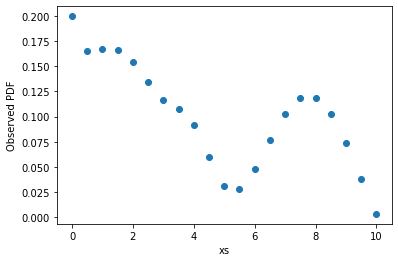

In [5]:
plt.scatter(xs, ys)
plt.xlabel('xs')
plt.ylabel('Observed PDF');

In [6]:
# Let's interpolate
x = np.linspace(min(xs), max(xs), 1000)
# Default linear interpolation
y1 = interp1d(xs, ys)(x)
# Nearest - Good for discrete not continuous
y2 = interp1d(xs, ys, kind='nearest')(x)
# Quadratic
y3 = interp1d(xs, ys, kind='quadratic')(x)
# Cubic
y4 = interp1d(xs, ys, kind='cubic')(x)
# Spline
y5 = splev(x, splrep(xs, ys))

### Data vs Default Interpolation

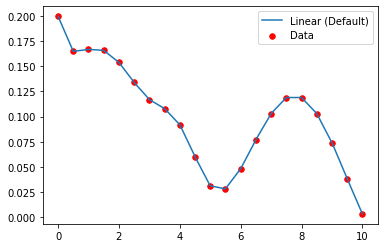

In [7]:
plt.scatter(xs, ys, s=30, label='Data', c='r')
plt.plot(x, y1, label='Linear (Default)')
plt.legend();

### Data vs Nearest Interpolation

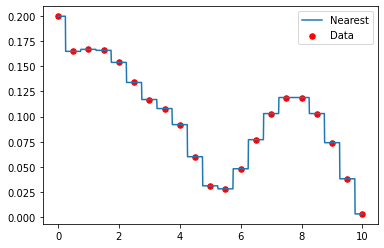

In [8]:
plt.scatter(xs, ys, s=30, label='Data', c='r')
plt.plot(x, y2, label='Nearest')
plt.legend();

### Data vs Quadratic Interpolation

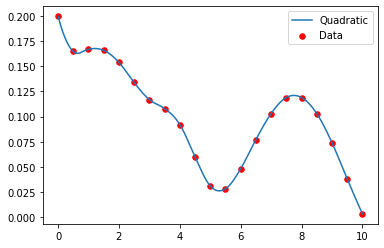

In [9]:
plt.scatter(xs, ys, s=30, label='Data', c='r')
plt.plot(x, y3, label='Quadratic', ls='-')
plt.legend();

### Data vs Cubic Interpolation

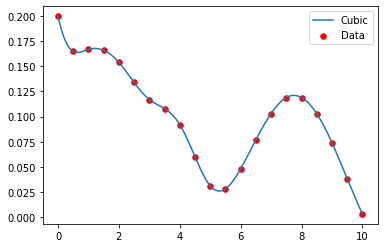

In [10]:
plt.scatter(xs, ys, s=30, label='Data', c='r')
plt.plot(x, y4, label='Cubic', ls='-')
plt.legend();

### Data vs Spline

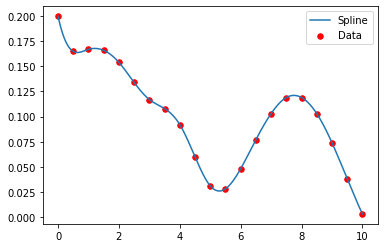

In [11]:
plt.scatter(xs, ys, s=30, label='Data', c='r')
plt.plot(x, y5, label='Spline', ls='-')
plt.legend();

### That turned observed data into a function
**Now need to integrate the function between points to get probability**

Scipy options:
- `scipy.integrate.trapz` Low accuracy but high speed
- `scipy.integrate.simps` Medium accuracy and pretty high speed
- `scipy.integrate.quad` High accuracy and low speed

In [12]:
def get_prob(xs, yx, a, b, resolution=1000):
    '''
    xs: X data
    ys: Y data
    a: Lower bound for wanted probability
    b: Upper bound for wanted probability
    '''
    # This part needed if data was observations rather than a PDF
    x_norm = np.linspace(min(xs), max(xs), resolution)
    y_norm = interp1d(xs, ys, kind='quadratic')(x_norm)
    normalisation = simps(y_norm, x=x_norm)
    
    # Get data within the bound of interest
    x_vals = np.linspace(a, b, resolution)
    y_vals = interp1d(xs, ys, kind='quadratic')(x_vals)
    
    # Only divide by normalisation if the data was observations rather than a PDF
    return simps(y_vals, x=x_vals) / normalisation

def get_cdf(xs, ys, v):
    return get_prob(xs, ys, min(xs), v)

def get_sf(xs, ys, v):
    return 1 - get_cdf(xs, ys, v)

In [13]:
print(get_prob(xs, ys, 0, 10))

1.0


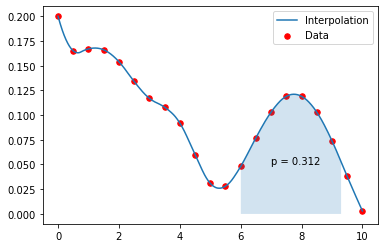

In [14]:
v1, v2 = 6, 9.3
area = get_prob(xs, ys, v1, v2)

plt.scatter(xs, ys, s=30, label='Data', color='r')
plt.plot(x, y3, linestyle='-', label='Interpolation')
plt.fill_between(x, 0, y3, where=(x>v1)&(x<=v2), alpha=0.2)
plt.annotate(f"p = {area:.3f}", (7, 0.05))
plt.legend();

### i.e. there is a 31.2% chance of getting a value between `6` and `9.3` in this data

/Users/afaan.naqvi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/scipy/integrate/_quadrature.py:372: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/Users/afaan.naqvi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/scipy/integrate/_quadrature.py:374: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +


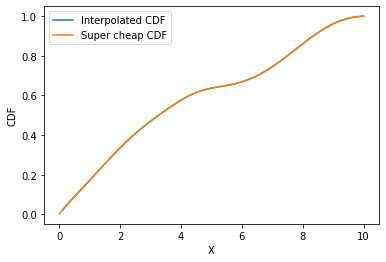

In [15]:
x_new = np.linspace(min(xs), max(xs), 100)
# Expensive way of cdf in each x_new
cdf_new = [get_cdf(xs, ys, i) for i in x_new]
# Cheap way using the quadratic interpolation (Sum of cumulative sum)
cheap_cdf = y3.cumsum() / y3.sum()

plt.plot(x_new, cdf_new, label='Interpolated CDF')
plt.plot(x, cheap_cdf, label='Super cheap CDF')
plt.ylabel("CDF")
plt.legend()
plt.xlabel("X");

Note that cumulative sum is effectively the same as the integration rectangle rule

These 2 give the same result but the first method is much slower and expensive